In [2]:
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
import seaborn as sns
import scikit_posthocs as sp
import matplotlib.pyplot as plt

Read the data from the 10 rounds of ChemProp cross validation

In [3]:
def get_chemprop_data(prefix, task_type):
    threshold = 0.5
    result_list = []
    for i in range(0,10):
        dirname = f"BSEP{i:03d}"
        df_test = pd.read_csv(f"{dirname}/{prefix}_test_{i:03d}.csv")
        df_test.BSEP = df_test.BSEP.astype(int)
        df_pred = pd.read_csv(f"{dirname}/{prefix}_result_{task_type}/test_preds.csv")  
        roc_auc = roc_auc_score(df_test.BSEP, df_pred.BSEP)
        pr_auc = average_precision_score(df_test.BSEP, df_pred.BSEP)
        hard_preds = [1 if p > threshold else 0 for p in df_pred.BSEP]
        mcc = matthews_corrcoef(df_test.BSEP, hard_preds)
        result_list.append([prefix, dirname,task_type,roc_auc, pr_auc, mcc])
        result_df = pd.DataFrame(result_list,columns=["split","dataset","task","roc_auc","pr_auc","mcc"])
    return result_df

Compile the data into a dataframe

In [4]:
df_list = []
for split in ["random","scaffold"]:
    for task in ["ST","MT"]:
        df_list.append(get_chemprop_data(split,task))
cp_df = pd.concat(df_list)
cp_df['method'] = 'chemprop'

Read the LightGBM results

In [5]:
lgbm_df = pd.read_csv("lgbm_result.csv")
lgbm_df['method'] = "lgbm"

Combine the ChemProp and LightGBM results into one dataframe

In [6]:
combo_df = pd.concat([cp_df,lgbm_df])
combo_df['desc'] = combo_df.method + "_" + combo_df.split + "_" + combo_df.task

Take a quick look at the data

In [7]:
combo_df

,split,dataset,task,roc_auc,pr_auc,mcc,method,desc
0,random,BSEP000,ST,0.848115,0.487970,0.400332,chemprop,chemprop_random_ST
1,random,BSEP001,ST,0.911765,0.660924,0.392326,chemprop,chemprop_random_ST
2,random,BSEP002,ST,0.778271,0.251751,0.175166,chemprop,chemprop_random_ST
3,random,BSEP003,ST,0.852774,0.640208,0.441391,chemprop,chemprop_random_ST
4,random,BSEP004,ST,0.928205,0.675551,0.339333,chemprop,chemprop_random_ST
5,random,BSEP005,ST,0.930769,0.706502,0.525242,chemprop,chemprop_random_ST
6,random,BSEP006,ST,0.879808,0.527562,0.497349,chemprop,chemprop_random_ST
7,random,BSEP007,ST,0.866999,0.684396,0.457895,chemprop,chemprop_random_ST
8,random,BSEP008,ST,0.874822,0.547285,0.320109,chemprop,chemprop_random_ST
9,random,BSEP009,ST,0.877709,0.597310,0.195066,chemprop,chemprop_random_ST


Split the random and scaffold cross validation datasets into separate dataframes.

In [8]:
df_random = combo_df.query("split == 'random'")
df_scaffold = combo_df.query("split == 'scaffold'")

A function to plot three boxplots side by side.  

In [81]:
def make_boxplots(df):
    sns.set_context('notebook')
    sns.set(rc={'figure.figsize':(4,3)},font_scale=1.5)
    sns.set_style('whitegrid')
    figure, axes = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(16,8))
    
    for i,stat in enumerate(["roc_auc", "pr_auc", "mcc"]):
        ax = sns.boxplot(x=stat,y="desc",ax=axes[i],data=df)
        title = stat.replace("_"," ").upper()
        ax.set_title(title)
        ax.set_ylabel("")
        ax.set_xlabel(title)
        ax.set_xlim(0,1)

A function to plot three barplots side by side. 

In [82]:
def make_barplots(df):
    sns.set(rc={'figure.figsize':(4,3)},font_scale=1.5)
    figure, axes = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(16,8))
    
    for i,stat in enumerate(["roc_auc", "pr_auc", "mcc"]):
        ax = sns.barplot(x=stat,y="desc",ax=axes[i],data=df)
        title = stat.replace("_"," ").upper()
        ax.set_title(title)
        ax.set_ylabel("")
        ax.set_xlabel(title)
        ax.set_xlim(0,1)

A function to plot three sign plots side by side.

In [83]:
def make_sign_plots(df):
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': True, 'square': True}
    sns.set(rc={'figure.figsize':(4,3)},font_scale=1.5)
    figure, axes = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(16,8))
    
    for i,stat in enumerate(["roc_auc", "pr_auc", "mcc"]):
        pc = sp.posthoc_conover_friedman(df,y_col=stat,group_col="desc",block_col="dataset",p_adjust="holm",melted=True)
        sub_ax, sub_c = sp.sign_plot(pc, **heatmap_args, ax=axes[i])
        sub_ax.set_title(stat.replace("_"," ").upper())

Boxplots for the random split cross validation subset. 

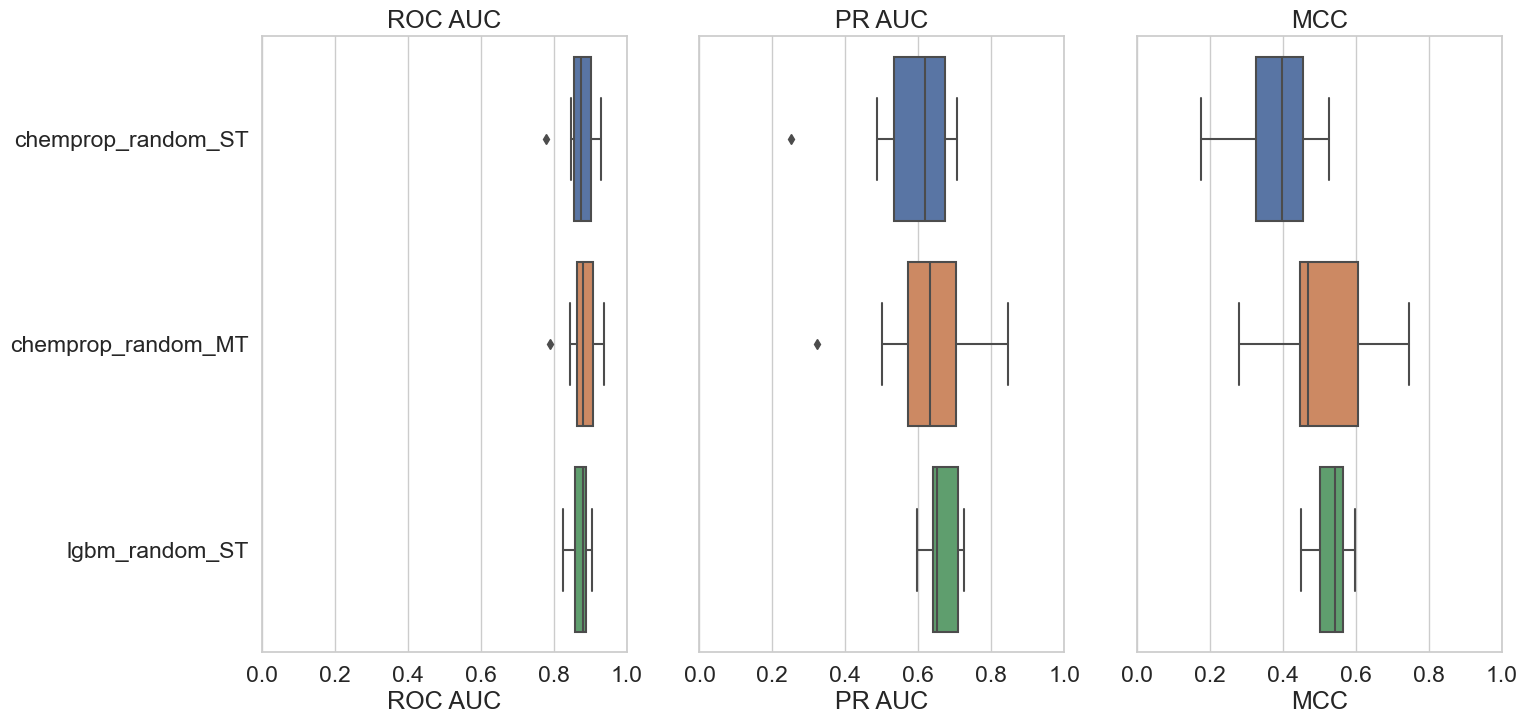

In [84]:
make_boxplots(df_random)

Sign plots of the random split cross validation subset 

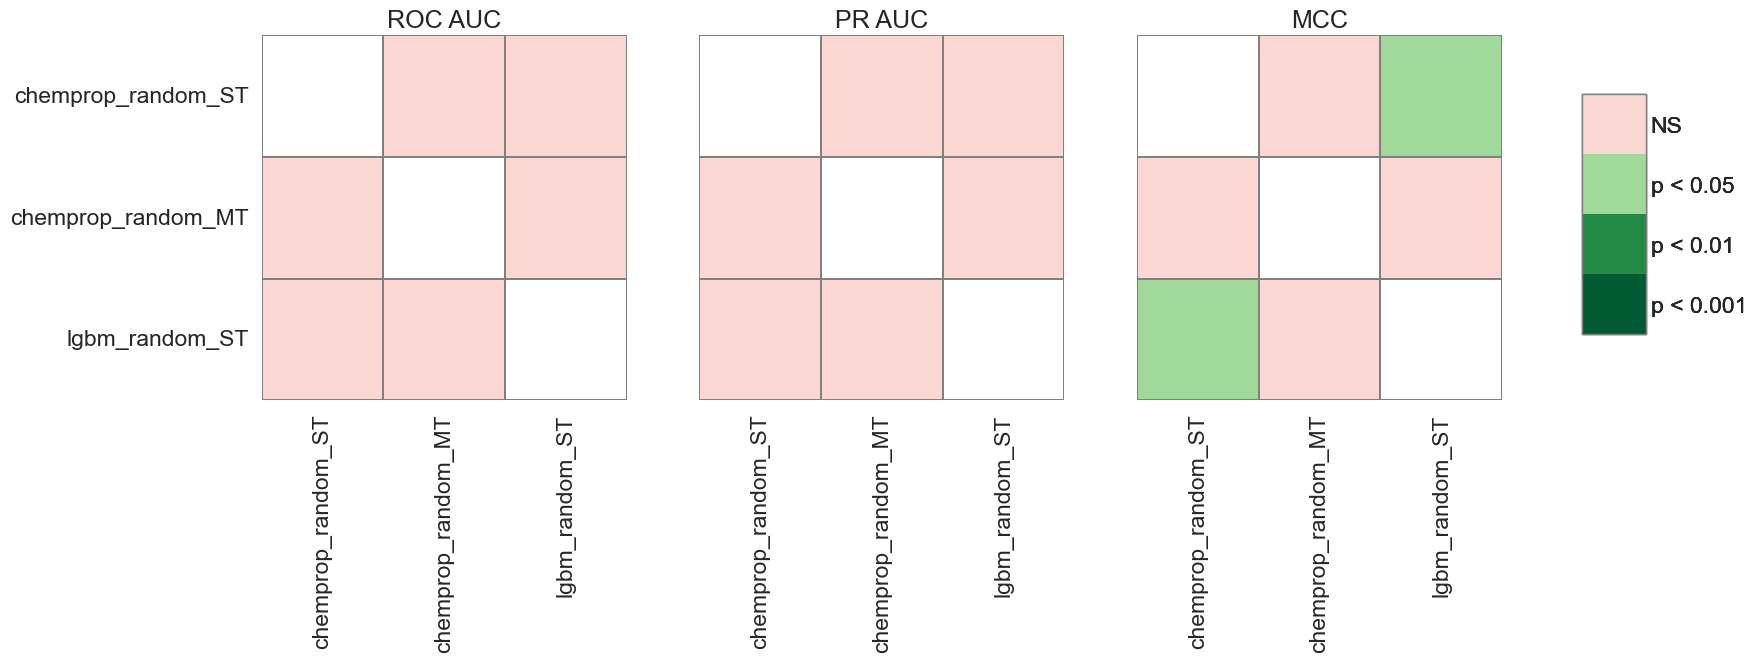

In [85]:
make_sign_plots(df_random)

Box plots of the scaffold split cross validation subset

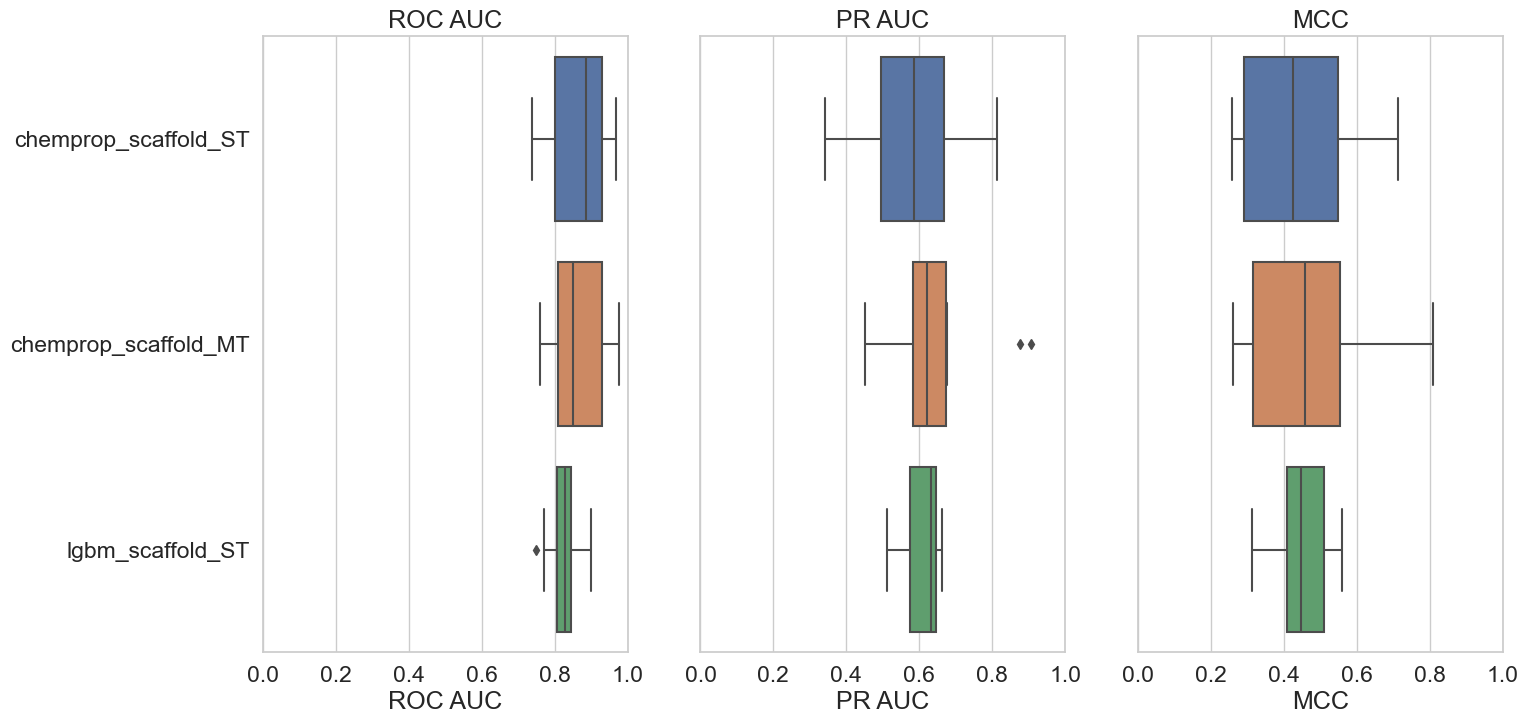

In [86]:
make_boxplots(df_scaffold)

Sign plots of the scaffold split cross validation subset

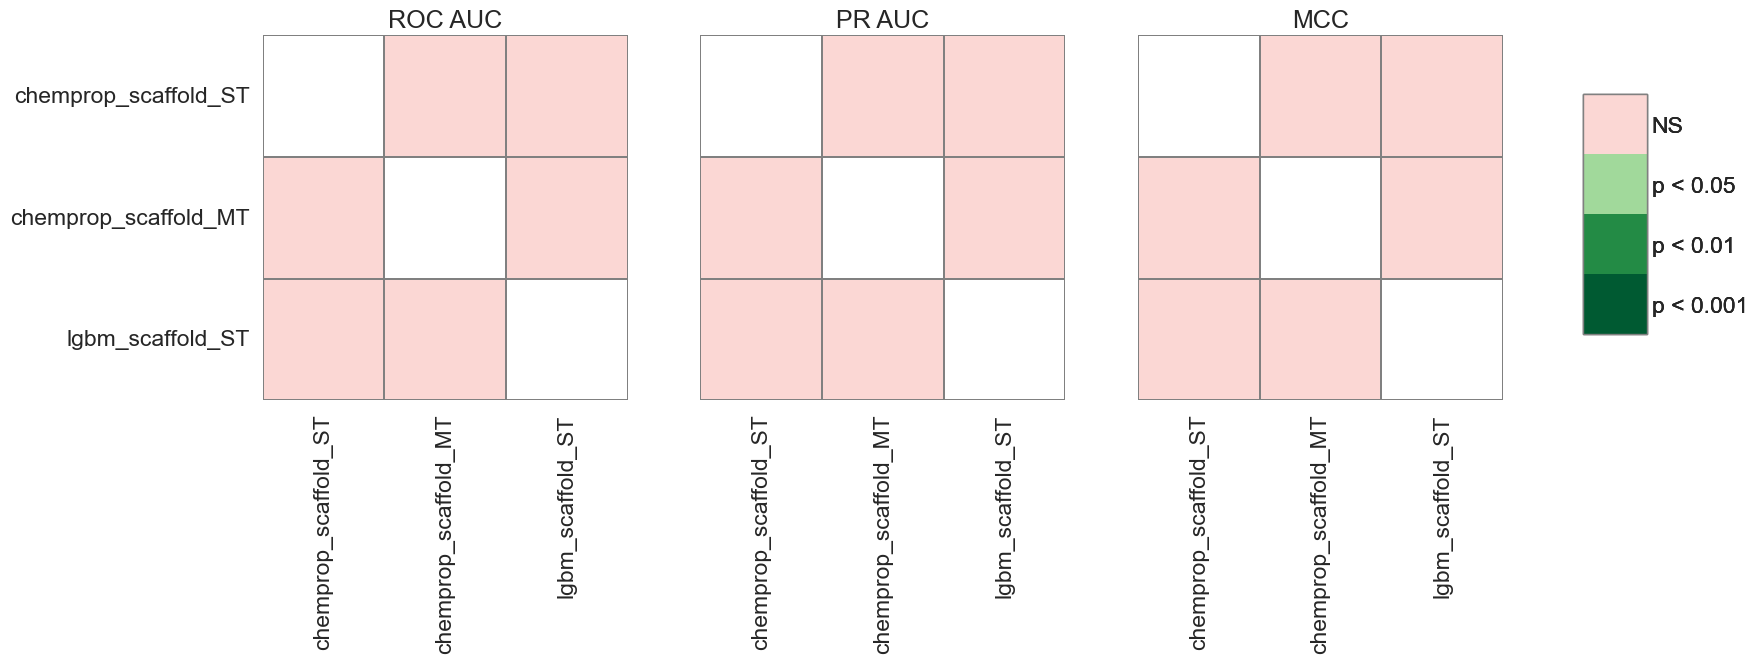

In [29]:
make_sign_plots(df_scaffold)